# We can convert the 6d to 7D to be more similar to Lockwood et al. 2022

In [30]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import os
ex_path = "/Users/simon/new-orleans/data/kate_h08"
os.listdir(ex_path)

['minpr.63.nc',
 'fort.224.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.221.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'fort.218.nc',
 'adcirc_log.txt',
 'maxele.63.nc',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'fort.222.nc',
 'fort.217.nc',
 'fort.223.nc',
 'fort.224',
 'fort.223',
 'traj.nc',
 'fort.222']

In [32]:
file_names = ['fort.73.nc', 'fort.74.nc', 'fort.63.nc', 'fort.64.nc']
variables = [('pressure',), ('windx', 'windy'), ('zeta',), ('u-vel', 'v-vel')]

In [33]:
import netCDF4 as nc

In [34]:
for i in range(len(file_names)):
    print([x for x in nc.Dataset(os.path.join(ex_path, file_names[i])).variables])

['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'pressure']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'windx', 'windy']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'zeta']
['time', 'x', 'y', 'element', 'adcirc_mesh', 'neta', 'nvdll', 'max_nvdll', 'ibtypee', 'nbdv', 'nvel', 'nvell', 'max_nvell', 'ibtype', 'nbvv', 'depth', 'u-vel', 'v-vel']


In [35]:
for i in range(len(file_names)):
    for variable in variables[i]:
        print(variable)
        print(nc.Dataset(os.path.join(ex_path, file_names[i]))[variable].long_name)

pressure
air pressure at sea level
windx
e/w wind velocity
windy
n/s wind velocity
zeta
water surface elevation above geoid
u-vel
water column vertically averaged east/west velocity
v-vel
water column vertically averaged north/south velocity


In [36]:
ds = nc.Dataset(os.path.join(ex_path, file_names[0]))

In [37]:
ds["pressure"].long_name

'air pressure at sea level'

In [38]:
ds["time"].long_name

'model time'

In [39]:
ds["time"].units

'seconds since 2020-04-28 00:00:00'

In [40]:
ds["time"][:]

masked_array(data=[   4800.,    9600.,   14400.,   19200.,   24000.,
                     28800.,   33600.,   38400.,   43200.,   48000.,
                     52800.,   57600.,   62400.,   67200.,   72000.,
                     76800.,   81600.,   86400.,   91200.,   96000.,
                    100800.,  105600.,  110400.,  115200.,  120000.,
                    124800.,  129600.,  134400.,  139200.,  144000.,
                    148800.,  153600.,  158400.,  163200.,  168000.,
                    172800.,  177600.,  182400.,  187200.,  192000.,
                    196800.,  201600.,  206400.,  211200.,  216000.,
                    220800.,  225600.,  230400.,  235200.,  240000.,
                    244800.,  249600.,  254400.,  259200.,  264000.,
                    268800.,  273600.,  278400.,  283200.,  288000.,
                    292800.,  297600.,  302400.,  307200.,  312000.,
                    316800.,  321600.,  326400.,  331200.,  336000.,
                    340800.,  3456

## Add all this weird nc data into a single xarray dataset.

In [41]:
import xarray as xr

In [42]:
traj_ds = xr.open_dataset(os.path.join(ex_path, "traj.nc"))

In [43]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 ...
    lat      (time) float64 ...

### Mess around with ADCIRC mesh

ds["adcirc_mesh"]

In [44]:
# triangular mesh elements stored in "element" variable
ds["element"][:]

masked_array(
  data=[[5189, 5434, 5190],
        [7845, 7777, 7844],
        [4551, 4806, 4807],
        ...,
        [ 997, 1079, 1078],
        [ 996, 1078, 1077],
        [1079, 1168, 1078]],
  mask=False,
  fill_value=999999,
  dtype=int32)

In [45]:
ds["element"][:].shape

(14761, 3)

Dimension: element, vertex, Units: mesh component [dimensionless]

In [46]:
xr.DataArray(ds["element"][:], dims=["element", "vertex"])

<xarray.DataArray (element: 14761, vertex: 3)>
array([[5189, 5434, 5190],
       [7845, 7777, 7844],
       [4551, 4806, 4807],
       ...,
       [ 997, 1079, 1078],
       [ 996, 1078, 1077],
       [1079, 1168, 1078]], dtype=int32)
Dimensions without coordinates: element, vertex

In [47]:
ds["depth"][:]  # depth at nodes

masked_array(data=[1., 1., 1., ..., 1., 1., 1.],
             mask=False,
       fill_value=1e+20)

In [48]:
ds["depth"][:].max(), ds["depth"][:].min() # can only get down to 1 meter of depth

(7987.0644531, 1.0)

In [49]:
ds["depth"][:].shape

(8303,)

In [50]:
xr.DataArray(ds["depth"][:], dims=["node"])

<xarray.DataArray (node: 8303)>
array([1., 1., 1., ..., 1., 1., 1.])
Dimensions without coordinates: node

### Let's look at the main variables

In [51]:
ds["pressure"][:].shape  # pressure at nodes

(252, 8303)

In [52]:
xr.Dataset(data_vars=dict(pressure=(["time", "node"], ds["pressure"][:])))

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33

In [53]:
ds_list = []
for i in range(len(file_names)):
    for variable in variables[i]:
        print(variable)
        ds_list.append(xr.Dataset(data_vars={
        variable: (["time", "node"], nc.Dataset(os.path.join(ex_path, file_names[i]))[variable][:]),
        }))

pressure
windx
windy
zeta
u-vel
v-vel


In [54]:
ds_list[0]

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33

In [55]:
merge_ds = xr.merge(ds_list)

In [56]:
merge_ds

<xarray.Dataset>
Dimensions:   (time: 252, node: 8303)
Dimensions without coordinates: time, node
Data variables:
    pressure  (time, node) float64 10.33 10.33 10.33 10.33 ... 10.33 10.33 10.33
    windx     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    windy     (time, node) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    zeta      (time, node) float64 3.793e-06 2.164e-05 ... -0.2057 -0.136
    u-vel     (time, node) float64 2.479e-05 2.382e-05 ... 0.06647 -0.001961
    v-vel     (time, node) float64 5.628e-06 1.081e-05 ... -0.01729 -0.00115

### How to convert from model time to datetime?

ds

In [57]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 -88.97 -88.97 -88.97 -88.97 ... -88.97 -88.97 -88.97
    lat      (time) float64 2.945 3.695 4.446 5.196 ... 41.95 42.7 43.45 44.2

In [58]:
merge_ds["pressure"].shape

(252, 8303)

In [59]:
252/14

18.0

In [60]:
traj_ds

<xarray.Dataset>
Dimensions:  (time: 56)
Coordinates:
  * time     (time) datetime64[ns] 2005-08-25 ... 2005-08-31T21:00:00
Data variables:
    lon      (time) float64 -88.97 -88.97 -88.97 -88.97 ... -88.97 -88.97 -88.97
    lat      (time) float64 2.945 3.695 4.446 5.196 ... 41.95 42.7 43.45 44.2

In [61]:
31 - 25

6

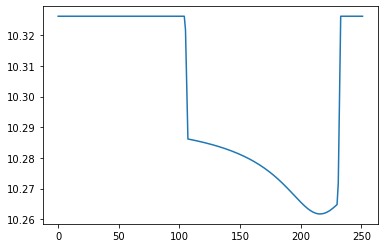

In [62]:
import matplotlib.pyplot as plt

plt.plot(merge_ds["pressure"].values[:, 25])

In [63]:
merge_ds["pressure"].values.shape

(252, 8303)

Text(0.5, 0, 'Time')

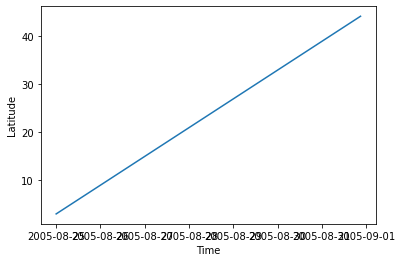

In [64]:
plt.plot(traj_ds["time"].values, traj_ds["lat"].values)
plt.ylabel("Latitude")
plt.xlabel("Time")

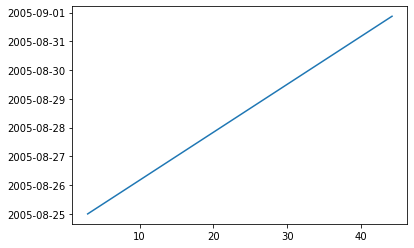

In [65]:
plt.plot(traj_ds["lat"].values, traj_ds["time"].values)


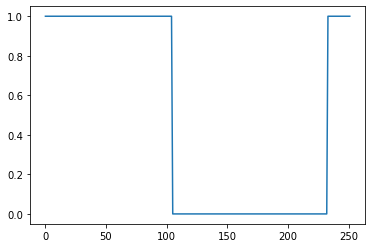

In [66]:
import numpy as np

bool_array = merge_ds["pressure"].values[:,3000] > 10.32619776 - 0.0001

plt.plot(bool_array)
change_array = np.diff(bool_array.astype(int))

In [67]:
np.where(change_array != 0)

(array([104, 232]),)

In [68]:
bool_array[105:233]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False]

In [69]:
bool_array[105:233].shape

(128,)

In [70]:
traj_ds["time"].values.shape

(56,)

In [71]:
128 / 56

2.2857142857142856

In [72]:
traj_ds["time"].values

array(['2005-08-25T00:00:00.000000000', '2005-08-25T03:00:00.000000000',
       '2005-08-25T06:00:00.000000000', '2005-08-25T09:00:00.000000000',
       '2005-08-25T12:00:00.000000000', '2005-08-25T15:00:00.000000000',
       '2005-08-25T18:00:00.000000000', '2005-08-25T21:00:00.000000000',
       '2005-08-26T00:00:00.000000000', '2005-08-26T03:00:00.000000000',
       '2005-08-26T06:00:00.000000000', '2005-08-26T09:00:00.000000000',
       '2005-08-26T12:00:00.000000000', '2005-08-26T15:00:00.000000000',
       '2005-08-26T18:00:00.000000000', '2005-08-26T21:00:00.000000000',
       '2005-08-27T00:00:00.000000000', '2005-08-27T03:00:00.000000000',
       '2005-08-27T06:00:00.000000000', '2005-08-27T09:00:00.000000000',
       '2005-08-27T12:00:00.000000000', '2005-08-27T15:00:00.000000000',
       '2005-08-27T18:00:00.000000000', '2005-08-27T21:00:00.000000000',
       '2005-08-28T00:00:00.000000000', '2005-08-28T03:00:00.000000000',
       '2005-08-28T06:00:00.000000000', '2005-08-28

In [73]:
merge_ds["pressure"].values

array([[10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       ...,
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776],
       [10.32619776, 10.32619776, 10.32619776, ..., 10.32619776,
        10.32619776, 10.32619776]])

### summary of time differences
So the time for the input seems to be every three hours for 56 timesteps -- for 7 days of total time.
For the output this seems to correspond to [104, 232] - so 128 or so timesteps (possibly off by one error) so seems to be an 80 minute timestep - 1:20.

In [74]:
56*3 / 24

7.0

In [75]:
232-104

128

In [76]:
128/7

18.285714285714285

In [78]:
nc.Dataset(os.path.join(ex_path, file_names[0]))["time"].units

'seconds since 2020-04-28 00:00:00'

In [80]:
np.diff(nc.Dataset(os.path.join(ex_path, file_names[0]))["time"][:])

masked_array(data=[4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800., 4800., 4800., 4800., 4800., 4800., 4800., 4800.,
                   4800.,

In [83]:
4800 / 60 

80.0